In [1]:
import pandas as pd
import datetime as dt
import csv
import math

benchmark = "102.swim"

CPU = []
baseline = []


# Data Pre-processing

# The function below converts year to the appropriate date
def data_fix(cpu_name):
    new_name = cpu_name[cpu_name.find('-') + 1:]
    if new_name.find('-') == 6:
        if '5' < new_name[0] <= '9':
            new_name = '19' + new_name   #years in 1999
        else:
            new_name = '20' + new_name   #years in
    new_name = new_name[:new_name.find('-')] 
    return dt.datetime.strptime(new_name, "%Y%m%d")


with open('benchmarks.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for row in csv_reader:
        if row[1] == benchmark:
            if row[0][0] != 'p':
                CPU.append(data_fix(row[0]))
                baseline.append(float(row[2]))
                 
print(len(CPU))
CPU

542


[datetime.datetime(1999, 1, 4, 0, 0),
 datetime.datetime(1999, 1, 18, 0, 0),
 datetime.datetime(1999, 1, 22, 0, 0),
 datetime.datetime(1999, 1, 22, 0, 0),
 datetime.datetime(1999, 1, 22, 0, 0),
 datetime.datetime(1999, 1, 22, 0, 0),
 datetime.datetime(1999, 1, 22, 0, 0),
 datetime.datetime(1999, 1, 22, 0, 0),
 datetime.datetime(1999, 1, 22, 0, 0),
 datetime.datetime(1999, 2, 1, 0, 0),
 datetime.datetime(1999, 2, 1, 0, 0),
 datetime.datetime(1999, 2, 1, 0, 0),
 datetime.datetime(1999, 2, 1, 0, 0),
 datetime.datetime(1999, 2, 26, 0, 0),
 datetime.datetime(1999, 3, 15, 0, 0),
 datetime.datetime(1999, 3, 15, 0, 0),
 datetime.datetime(1999, 3, 15, 0, 0),
 datetime.datetime(1999, 3, 15, 0, 0),
 datetime.datetime(1999, 3, 15, 0, 0),
 datetime.datetime(1999, 3, 15, 0, 0),
 datetime.datetime(1999, 3, 15, 0, 0),
 datetime.datetime(1999, 3, 29, 0, 0),
 datetime.datetime(1999, 3, 29, 0, 0),
 datetime.datetime(1999, 3, 29, 0, 0),
 datetime.datetime(1999, 3, 29, 0, 0),
 datetime.datetime(1999, 3, 29

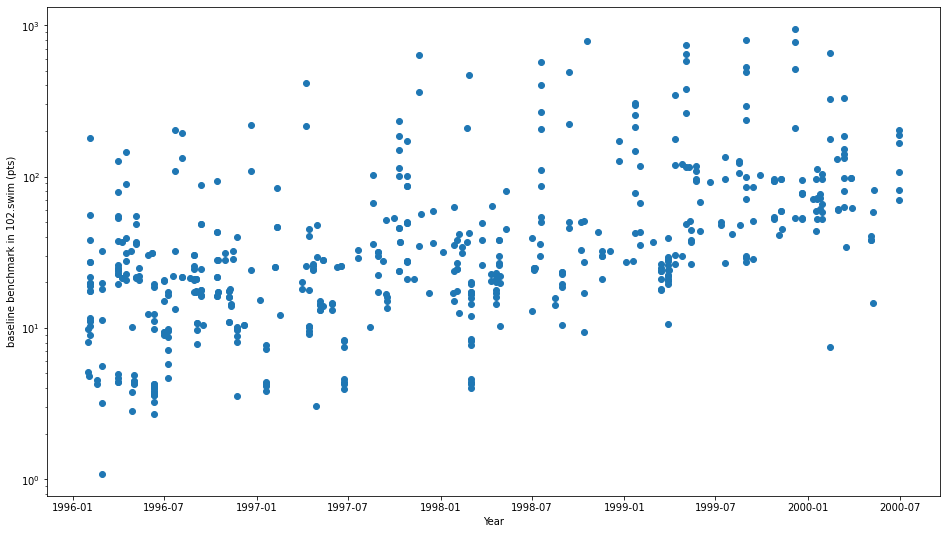

In [2]:
from matplotlib import pyplot as plt
plt.figure(figsize = (16,9))
plt.scatter(CPU, baseline)
plt.xlabel('Year')
plt.yscale('log')
plt.ylabel('baseline benchmark in 102.swim (pts)')
plt.show()

In [3]:
import numpy as np
from sklearn import linear_model

CPU_date = list(map(lambda x: [int(round(x.timestamp()))], CPU))

cpu_date_train = CPU_date[:-90]
cpu_date_test = CPU_date[-90:]

baseline_train = baseline[:-90]
baseline_test = baseline[-90:]


In [7]:
# Auxiliary function to take the log since the baseline
def take_log(arr):
    log = list(map(lambda elem: math.log(elem, 2), arr))
    return log

regression1 = linear_model.LinearRegression()
regression1.fit(cpu_date_train, take_log(baseline_train))
baseline_pred = (regression1.predict(CPU_date))**2
base_res_pred_test = regression1.predict(cpu_date_test)


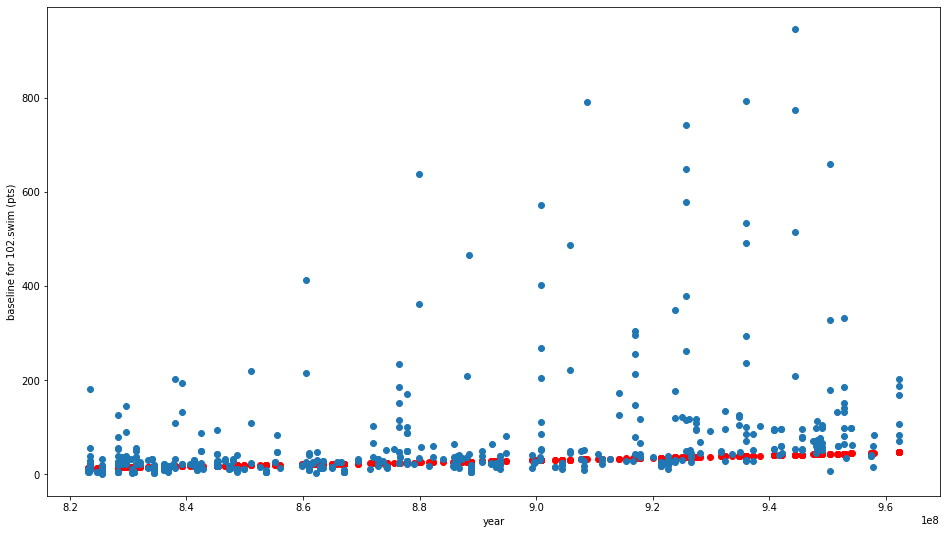

[2.22259633e-08] -14.593076980320998


In [9]:
plt.figure(figsize=(16,9))
plt.scatter(CPU_date, baseline_pred, color="red")
plt.scatter(CPU_date, baseline)
plt.xlabel('year')
plt.ylabel('baseline for 102.swim (pts)')
plt.show()
print(regression1.coef_, regression1.intercept_)

## Problem 2

In [10]:
from sklearn.datasets import load_digits
from sklearn import neighbors

In [11]:
digits = load_digits()

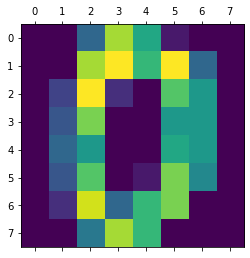

In [12]:
import matplotlib.pyplot as plt 
plt.matshow(digits.images[0]) 
plt.show() 

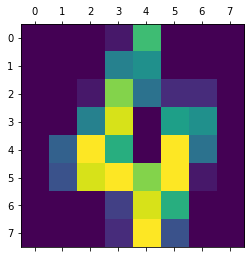

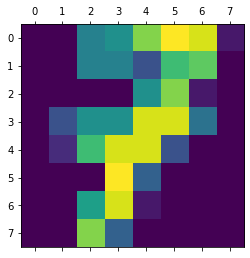

In [13]:
plt.matshow(digits.images[4]) 
plt.matshow(digits.images[7])
plt.show()

In [14]:
X_data = []
Y_data = []
for i in range(len(digits.target)): 
    if digits.target[i] == 4 or digits.target[i] == 7:
        X_data.append(digits.data[i])
        Y_data.append(digits.target[i])

k = 3

X_train = X_data[:-90]
X_test = X_data[-90:]

Y_train = Y_data[:-90]
Y_test = Y_data[-90:]

In [15]:
cluster = neighbors.KNeighborsClassifier(k)
cluster.fit(X_train, Y_train)

prediction = cluster.predict(X_test)
print("Total Error:", 1 - sum(prediction == Y_test) / len(Y_test))

Total Error: 0.022222222222222254


In [16]:
Y_test

[7,
 7,
 4,
 7,
 4,
 4,
 7,
 4,
 4,
 7,
 7,
 4,
 4,
 4,
 7,
 4,
 7,
 4,
 7,
 4,
 7,
 7,
 7,
 7,
 4,
 4,
 7,
 7,
 4,
 7,
 4,
 4,
 7,
 4,
 4,
 7,
 7,
 4,
 4,
 4,
 7,
 4,
 4,
 7,
 4,
 7,
 7,
 7,
 7,
 4,
 4,
 7,
 7,
 4,
 7,
 4,
 4,
 7,
 4,
 4,
 7,
 7,
 4,
 4,
 4,
 7,
 4,
 7,
 4,
 7,
 4,
 7,
 7,
 7,
 7,
 4,
 4,
 7,
 7,
 4,
 7,
 4,
 4,
 7,
 4,
 4,
 7,
 7,
 4,
 4]